In [83]:
# Import Dependenices 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
# seaborn style
sns.set_style('whitegrid')
# Import More Dependenices 
%matplotlib inline
import matplotlib
from datetime import datetime
# warnings 
import warnings
warnings.filterwarnings("ignore")

# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import json 
import csv

In [84]:
#Read csv XRP
xrp_csv = pd.read_csv("resources/XRPUSD.csv")
xrp_csv.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06


In [85]:
# Read CSV bitcoin 
btc_csv = pd.read_csv("resources/BTCUSD.csv")
btc_csv.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1643846400,2022-02-03 00:00:00,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02 00:00:00,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01 00:00:00,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31 00:00:00,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30 00:00:00,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [86]:
# ethereum
eth_csv = pd.read_csv("resources/ETHUSD.csv")
eth_csv.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03 00:00:00,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02 00:00:00,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01 00:00:00,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31 00:00:00,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30 00:00:00,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [87]:
# dogecoin 
ltc_csv = pd.read_csv("resources/LTCUSD.csv")
ltc_csv.head()

,unix,date,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03 00:00:00,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [88]:
#Merge XRP & BTC
combined_xrp_btc_df = pd.merge(xrp_csv, btc_csv, on=["unix","date"])
combined_xrp_btc_df.head()

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume XRP,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume BTC,Volume USD_y
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [89]:
#rename columns 
combined_xrp_btc_df = combined_xrp_btc_df.rename(columns={"symbol_x":"XRP Symbol",
                                                          "open_x":"XRP Open",
                                                          "high_x":"XRP High", 
                                                          "low_x":"XRP Low",
                                                         "close_x": "XRP Close",
                                                         "Volume USD_x":"XRP Volume USD",
                                                         "symbol_y":"BTC Symbol",
                                                          "open_y":"BTC Open",
                                                          "high_y":"BTC High", 
                                                          "low_y":"BTC Low",
                                                         "close_y": "BTC Close",
                                                         "Volume USD_y":"BTC Volume USD"})
combined_xrp_btc_df


,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [90]:
combined_three_df = pd.merge(combined_xrp_btc_df, eth_csv, on=["unix","date"])
combined_three_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,BTC Close,Volume BTC,BTC Volume USD,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,36914.82,22.073478,8.148385e+05,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,36923.50,1672.707195,6.176220e+07,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,38733.04,2073.938717,8.032995e+07,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,38491.92,2009.130003,7.733527e+07,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,37941.82,708.794813,2.689297e+07,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [91]:
#rename columns 
combined_three_df = combined_three_df.rename(columns={"symbol":"ETH Symbol",
                                                          "open":"ETH Open",
                                                          "high":"ETH High", 
                                                          "low":"ETH Low",
                                                         "close": "ETH Close",
                                                         "Volume USD":"ETH Volume USD",
                                                         })
combined_xrp_btc_df


,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [92]:
#last merge
combined_final_df = pd.merge(combined_three_df, ltc_csv, on=["unix","date"])
combined_final_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [93]:
#rename columns 
combined_final_df = combined_final_df.rename(columns={"symbol":"LTC Symbol",
                                                          "open":"LTC Open",
                                                          "high":"LTC High", 
                                                          "low":"LTC Low",
                                                         "close": "LTC Close",
                                                         "Volume USD":"LTC Volume USD",
                                                         })
combined_final_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1643846400,2022-02-03 00:00:00,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02 00:00:00,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01 00:00:00,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31 00:00:00,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30 00:00:00,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2532,1425081600,2015-02-28 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2533,1424995200,2015-02-27 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2534,1424908800,2015-02-26 00:00:00,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00


In [94]:
#clean up columns don't need, didn't need symbols for 4 columns #less data per instructions, dropped extra rows for pre & post covid data

cleaned= combined_final_df.drop(columns=['unix','XRP Symbol','BTC Symbol','ETH Symbol','LTC Symbol']).iloc[:1000]
cleaned

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,ETH Low,ETH Close,Volume ETH,ETH Volume USD,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,2022-02-03 00:00:00,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,36924.50,37039.89,36803.54,...,2667.11,2697.13,159.102953,4.291213e+05,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,2022-02-02 00:00:00,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,38768.08,38883.96,36618.36,...,2608.78,2682.30,20322.411654,5.451080e+07,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,2022-02-01 00:00:00,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,38483.56,39285.00,38033.78,...,2676.98,2791.04,29375.252979,8.198751e+07,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,2022-01-31 00:00:00,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,37914.10,38776.33,36631.66,...,2479.78,2688.91,27255.629475,7.328793e+07,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,2022-01-30 00:00:00,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,38176.45,38378.88,37372.59,...,2543.64,2602.37,8359.759751,2.175519e+07,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-05-15 00:00:00,0.40731,0.46950,0.40731,0.45765,8.860760e+07,4.055127e+07,7991.72,8300.00,7838.00,...,217.29,248.79,169027.318494,4.205231e+07,91.50,104.44,90.46,102.15,149413.134506,1.526255e+07
996,2019-05-14 00:00:00,0.32353,0.42500,0.32300,0.40731,1.546121e+08,6.297505e+07,7810.72,8335.56,7618.99,...,194.99,217.50,158567.561156,3.448844e+07,87.61,94.60,85.83,91.49,120110.595749,1.098892e+07
997,2019-05-13 00:00:00,0.31014,0.33400,0.30800,0.32355,3.862825e+07,1.249817e+07,6968.84,8167.50,6863.75,...,185.64,196.47,134219.118868,2.637003e+07,84.76,93.46,84.09,87.87,105797.965415,9.296467e+06
998,2019-05-12 00:00:00,0.32268,0.33179,0.30005,0.31022,2.567929e+07,7.966231e+06,7214.40,7585.00,6762.57,...,182.64,188.26,142728.778407,2.687012e+07,87.88,94.44,83.01,84.71,146790.084035,1.243459e+07


In [95]:
#convert date into datetime for later resampling purposes 

cleaned['date'] = cleaned.loc[:,'date'].astype('datetime64[ns]')

cleaned = cleaned[['date','XRP Close', 'BTC Close', 'ETH Close', 'LTC Close']]
cleaned.set_index('date',inplace=True)
print(cleaned)


            XRP Close  BTC Close  ETH Close  LTC Close
date                                                  
2022-02-03    0.59873   36914.82    2697.13     108.17
2022-02-02    0.60129   36923.50    2682.30     108.37
2022-02-01    0.62794   38733.04    2791.04     115.09
2022-01-31    0.61740   38491.92    2688.91     109.61
2022-01-30    0.60226   37941.82    2602.37     108.79
...               ...        ...        ...        ...
2019-05-15    0.45765    8208.69     248.79     102.15
2019-05-14    0.40731    7986.00     217.50      91.49
2019-05-13    0.32355    7810.05     196.47      87.87
2019-05-12    0.31022    6974.35     188.26      84.71
2019-05-11    0.32222    7217.47     192.00      87.88

[1000 rows x 4 columns]


In [96]:
#Resample dataframe in order to get monthly prices and yearly prices
cleaned_Monthly_Price = cleaned.resample('M').mean()
cleaned_Yearly_Price = cleaned.resample('Y').mean()
print(cleaned_Monthly_Price)
print(cleaned_Yearly_Price)


            XRP Close     BTC Close    ETH Close   LTC Close
date                                                        
2019-05-31   0.396590   8006.111429   245.090476   98.407143
2019-06-30   0.424414   9395.695333   274.036000  126.332667
2019-07-31   0.341725  10653.706452   247.822581  102.439677
2019-08-31   0.284481  10633.105161   199.530323   80.027742
2019-09-30   0.262245   9788.515333   185.632667   66.863000
2019-10-31   0.280630   8380.580968   178.616452   55.874194
2019-11-30   0.260236   8335.742000   172.726667   55.616333
2019-12-31   0.206310   7245.612258   137.224839   42.598710
2020-01-31   0.221294   8367.920000   156.428065   53.194194
2020-02-29   0.274324   9637.424138   238.789310   72.607241
2020-03-31   0.182872   6872.220645   160.391935   44.244839
2020-04-30   0.191786   7222.294667   171.569000   42.944000
2020-05-31   0.204734   9258.634194   207.505161   44.784194
2020-06-30   0.192032   9479.943667   235.842000   44.389333
2020-07-31   0.202990   

Text(0.5, 1.0, 'Price Per Monthly Close')

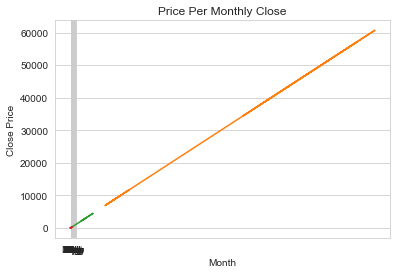

In [98]:
#bar graph plot closing prices over year each crypto 
Lines = cleaned_Monthly_Price[["XRP Close", "BTC Close", "ETH Close", "LTC Close"]]
months = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
          'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
         'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
         'Jan', 'Feb']
plt.xticks(np.linspace(0,1034,34), months)

lx_axis = cleaned_Monthly_Price
ly_axis = Lines
plt.plot(lx_axis, ly_axis)
plt.xlabel("Month")
plt.ylabel("Close Price")
plt.title("Price Per Monthly Close")





Text(0.5, 1.0, 'Price Per Monthly Close')

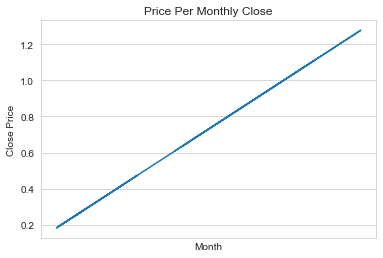

In [99]:
#bar graph plot closing prices over year each crypto JUST XRP
Lines = cleaned_Monthly_Price["XRP Close"]
months = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
          'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
         'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
         'Jan', 'Feb']
plt.xticks(np.linspace(0,1034,34), months)

lx_axis = cleaned_Monthly_Price["XRP Close"]
ly_axis = Lines
plt.plot(lx_axis, ly_axis)
plt.xlabel("Month")
plt.ylabel("Close Price")
plt.title("Price Per Monthly Close")

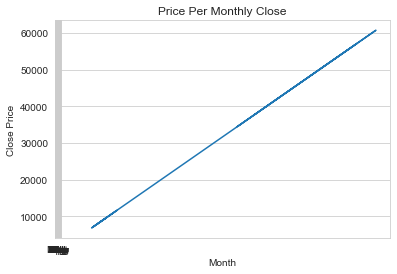

In [100]:
#bar graph plot closing prices over year each crypto JUST BTC
Lines = cleaned_Monthly_Price["BTC Close"]
months = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 
          'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
         'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec',
         'Jan', 'Feb']


lx_axis = cleaned_Monthly_Price["BTC Close"]
ly_axis = Lines
plt.plot(lx_axis, ly_axis)
plt.xlabel("Month")
plt.ylabel("Close Price")
plt.title("Price Per Monthly Close")
plt.xticks(np.linspace(0,1034, 34), months)
matplotlib.dates.MonthLocator(interval=6)